In [5]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
# from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
df = pd.read_csv('Twitter_Data/sentiment.csv' , encoding="ISO-8859-1")

In [7]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('Twitter_Data/sentiment.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1317818,4,2014308525,Wed Jun 03 01:06:09 PDT 2009,NO_QUERY,intelligensia,@kenyanpundit she would have been attending to...
1562356,4,2186812581,Mon Jun 15 19:22:23 PDT 2009,NO_QUERY,VIXEN02x,Alrighty well im going 2 see the Hangover... f...
703413,0,2255698098,Sat Jun 20 11:39:18 PDT 2009,NO_QUERY,beautifuldaymua,Stuck in traffic. Was being so productive unt...
978931,4,1833883809,Mon May 18 00:48:22 PDT 2009,NO_QUERY,rebeccabecky,"nevermind, the best album of the century in my..."
440569,0,2066770516,Sun Jun 07 11:08:22 PDT 2009,NO_QUERY,JazzieMae,Work work and more work


In [8]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [9]:
df['target'].unique()

array([0, 4], dtype=int64)

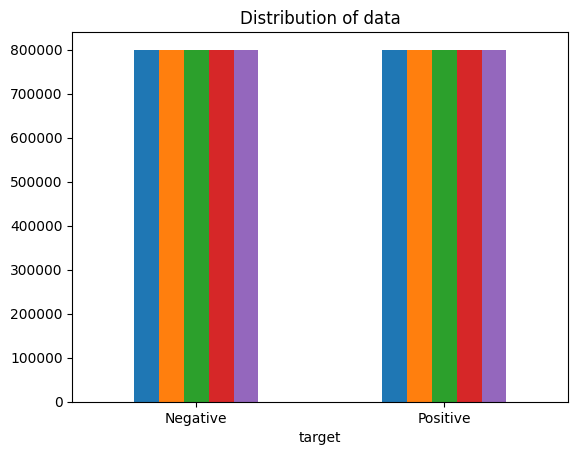

In [10]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

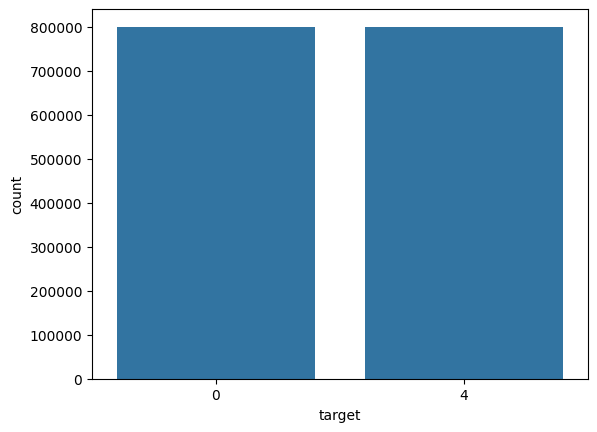

In [11]:
import seaborn as sns
sns.countplot(x='target', data=df)


In [12]:
data=df[['text','target']]

In [13]:
data.loc[data['target']==4 , 'target'] =1

In [14]:
data['target'].unique()

array([0, 1], dtype=int64)

In [15]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [16]:
data_pos = data_pos.iloc[:int(5000)]
data_neg = data_neg.iloc[:int(5000)]

In [17]:
dataset = pd.concat([data_pos, data_neg])

In [18]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

4995                              long day today 
4996               a friend broke his promises.. 
4997         @gjarnling i am fine thanks - tired 
4998    trying to keep my eyes open..damn baking 
4999                  why the hell is it snowing 
Name: text, dtype: object

In [19]:
from nltk.corpus import stopwords
import nltk
# Download the stopwords dataset
nltk.download('stopwords')

# Get the English stopwords list
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yethu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [21]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

4995                      long day today
4996               friend broke promises
4997        gjarnling fine thanks  tired
4998    trying keep eyes opendamn baking
4999                        hell snowing
Name: text, dtype: object

In [22]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

4995                      long day today
4996               friend broke promises
4997        gjarnling fine thanks  tired
4998    trying keep eyes opendamn baking
4999                        hell snowing
Name: text, dtype: object

In [23]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

4995                      long day today
4996               friend broke promises
4997        gjarnling fine thanks  tired
4998    trying keep eyes opendamn baking
4999                        hell snowing
Name: text, dtype: object

In [24]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

4995                      long day today
4996               friend broke promises
4997        gjarnling fine thanks  tired
4998    trying keep eyes opendamn baking
4999                        hell snowing
Name: text, dtype: object

In [25]:

dataset['text'] = dataset['text'].apply(lambda x : x.split())




In [26]:
dataset['text']

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
                                ...                        
4995                                     [long, day, today]
4996                              [friend, broke, promises]
4997                       [gjarnling, fine, thanks, tired]
4998                 [trying, keep, eyes, opendamn, baking]
4999                                        [hell, snowing]
Name: text, Length: 10000, dtype: object

In [27]:
dataset['target']

800000    1
800001    1
800002    1
800003    1
800004    1
         ..
4995      0
4996      0
4997      0
4998      0
4999      0
Name: target, Length: 10000, dtype: int64

In [28]:
import nltk

# Ensure NLTK data is downloaded
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yethu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
from nltk.stem import PorterStemmer, LancasterStemmer

stemmer = PorterStemmer()

dataset['text'] = dataset['text'].apply(lambda x : [stemmer.stem(i) for i in x])

In [30]:
dataset['text'].head()

800000               [love, healthuandpet, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
Name: text, dtype: object

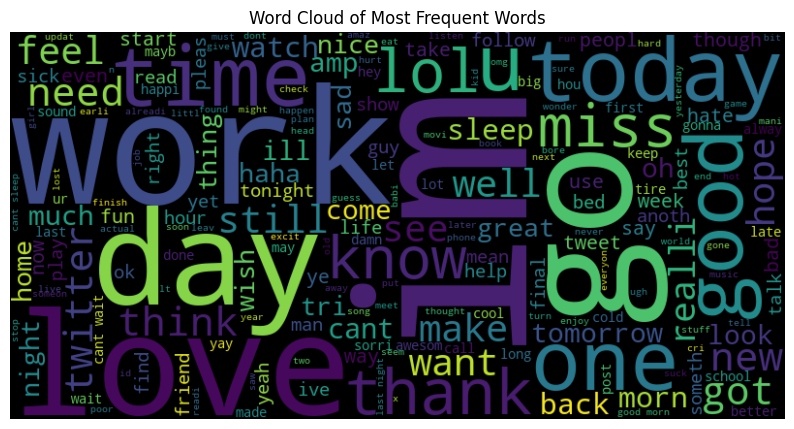

In [31]:

from wordcloud import WordCloud

# Step 1: Flatten the list of tokens into a single list of words
all_words = [word for sublist in dataset['text'] for word in sublist]

# Step 2: Create a string of all words separated by spaces
all_words_string = ' '.join(all_words)

# Step 3: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words_string)

# Step 4: Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Most Frequent Words')
plt.show()

In [37]:
from nltk import FreqDist
freq_dist = FreqDist(all_words)
freq_dist.most_common(10)
# Convert to DataFrame for Seaborn
common_words = freq_dist.most_common(10)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

<Axes: xlabel='Word', ylabel='Frequency'>

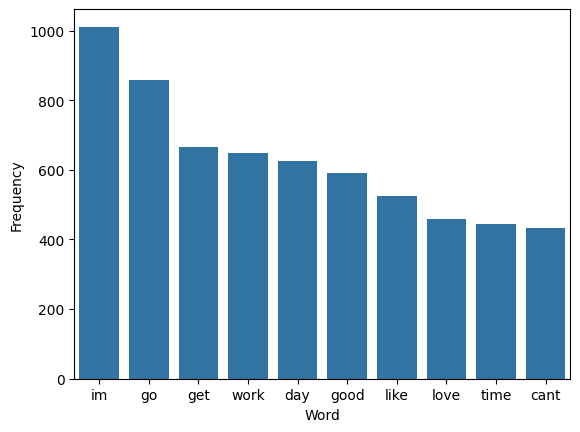

In [38]:
sns.barplot(x='Word', y='Frequency', data=df_common_words )


In [40]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()
dataset['text'] = dataset['text'].apply(lambda x: ' '.join(x))

# Fit and transform the data
X = vectorizer.fit_transform(dataset['text'])  

In [41]:
dataset['target']

800000    1
800001    1
800002    1
800003    1
800004    1
         ..
4995      0
4996      0
4997      0
4998      0
4999      0
Name: target, Length: 10000, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , dataset['target'] , random_state=101 , test_size=0.2)

In [45]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train , y_train)

LogisticRegression()

In [51]:
from sklearn.metrics import accuracy_score
y_pred = lreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.744

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')

print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.72
Recall: 0.78
F1 Score: 0.75
